In [7]:
import pandas as pd
from pathlib import Path

data = r'C:/Users/Pbl4/pbl4/davomat/dataset/origin_images'

paths = [path.parts[-2:] for path in
         Path(data).rglob('*.*')]                             #writing purpose ('*.*') so that all image formats can be retrieved
df = pd.DataFrame(data=paths, columns=['Class','Images'])     #create column names for dataframe
df = df.sort_values('Class',ascending=True)                   #sort class name
df.reset_index(drop=True, inplace=True)                       #sort index of each row
# df       

In [8]:
import os
import pandas as pd

# Assuming df is your DataFrame containing image dataset information

# Count the number of image datasets
# print('Count the number of image datasets')
# print("Image Count : {}".format(len(df.Images)))
# print("Class Count : {} \n".format(len(df['Class'].value_counts())))

# Count the number of images in each class
# print('Count the number of images in each class')
class_counts = df['Class'].value_counts()
# print(class_counts)

# Save the data in HTML format
output_html = 'image_dataset_statistics.html'
filename = r'C:/Users/Pbl4/pbl4/davomat/templates/'+output_html

if os.path.exists(filename):
    os.remove(filename)

# Creating HTML content
html_content = '''
<div>
    <h2>Count the number of image datasets</h2>
    <p>Image Count: {}</p>
    <p>Class Count: {}</p>

    <h2>Count the number of images in each class</h2>
    <table class="table">
    <thead>
        <tr>
        <th scope="col">#</th>
        <th scope="col">Class</th>
        <th scope="col">Image number</th>
        </tr>
    </thead>
    <tbody>
    '''.format(len(df.Images), len(class_counts))

# Adding class counts to HTML content
i=1
for class_name, count in class_counts.items():
    html_content += '''
        <tr>
            <td>{i}</td>
            <td>{}</td>
            <td>{}</td>
        </tr>
    '''.format(class_name, count)
    i=i+1


# Closing HTML content
html_content += '''

    </tbody>
    </table>
</div>

'''

# Writing HTML content to file
with open(filename, 'w') as f:
    f.write(html_content)

# print('Data saved to', output_html)


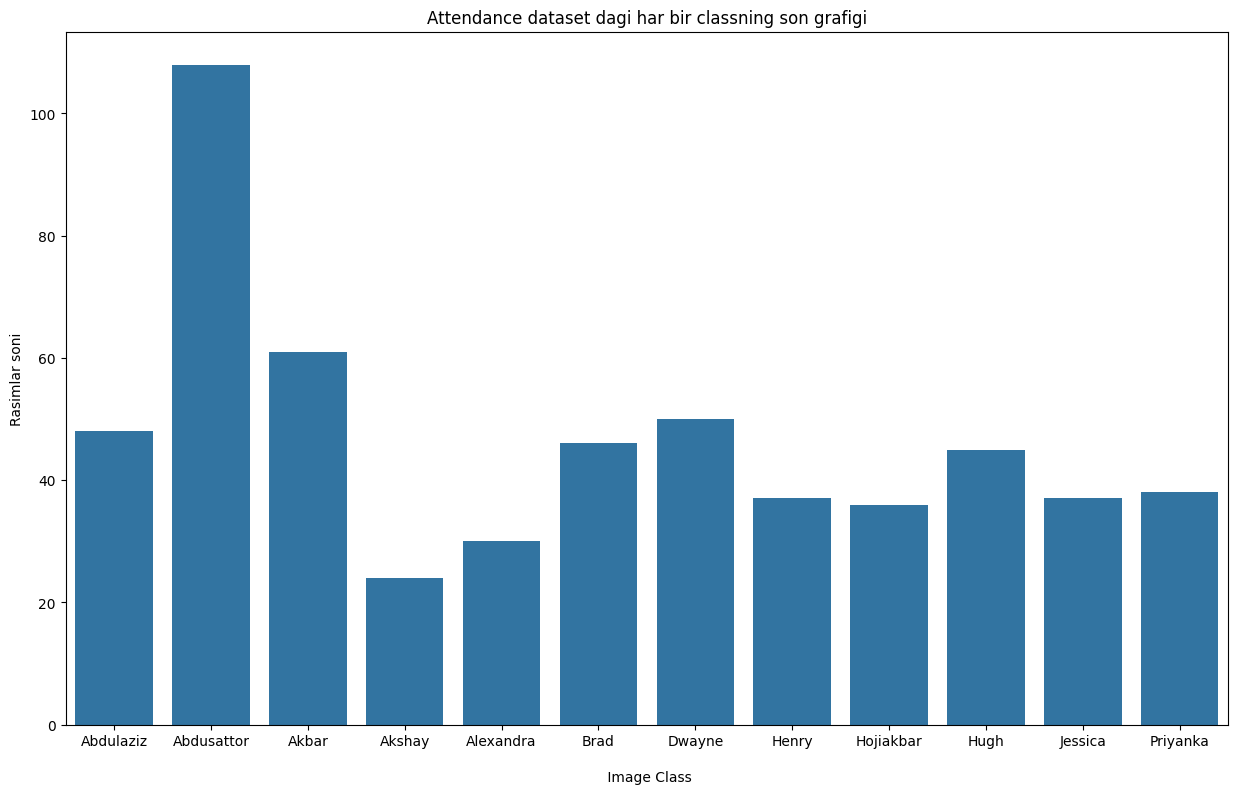

In [10]:
import os
import seaborn as sns
from matplotlib import pyplot as plt

filename = r'C:/Users/Pbl4/pbl4/davomat/static/eda_img/eda.png'

# Check if the file exists and delete it if it does
if os.path.exists(filename):
    os.remove(filename)

# Create the plot
fig, ax = plt.subplots(figsize=(15, 9))
sns.countplot(data=df, x='Class', ax=ax)
plt.title('Attendance dataset dagi har bir classning son grafigi')
plt.xlabel('\n Image Class')
plt.ylabel('Rasimlar soni')

# Save the figure to an image file
plt.savefig(filename, dpi=300, bbox_inches='tight')

# Show the plot
# plt.show()



In [11]:
import os
import plotly.express as px
import plotly.io as pio

filename = r'C:/Users/Pbl4/pbl4/davomat/templates/fig.html'

if os.path.exists(filename):
    os.remove(filename)

# Calculate the value counts for the 'Class' column
class_counts = df['Class'].value_counts(sort=False)

# Create the pie chart
fig = px.pie(
    df,
    values=class_counts.values,
    names=class_counts.index,
    hole=0.5
)

# Update layout and traces
fig.update_layout(
    title='Data Distribution of Padang Cuisine Image Dataset',
    font_size=15,
    title_x=0.45,
    annotations=[
        dict(
            text='Padang Cuisine Image Dataset',
            font_size=10,
            showarrow=False,
            height=1000,
            width=1000
        )
    ]
)
fig.update_traces(
    textfont_size=15,
    textinfo='percent'
)

# Show the figure
# fig.show()

# Save the figure to an HTML file
pio.write_html(fig, filename, auto_open=False)
